# 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 캐글 데이터분석 전과정이 성공적으로 진행되었는가|데이터 전처리 방법과 시각화 도구를 사용하여, 문제에서 제시된 요구사항들을 모두 만족했는가?|OK|
|2. 전처리, 학습과정 및 결과에 대한 설명이 시각화를 포함하여 체계적으로 진행되었는가?|제출한 주피터노트북 파일이 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었다.|OK|
|3. 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었다.|OK|

### dataset
1. Kaggle Korea에서 제공하는 House Price 

### 적용할 알고리즘
1. LightGBM Regressor
2. XGBoost Regressor
3. Random Foreast Regressor
4. GradientBoost Regressor

### 회귀 성능 평가 지표  
1. RMSE(Root Mean Squared Error)
2. RMSLE(Root Mean Squared Log Error)


## 문제 정의  

> Regression Tree 적용하여 House Price 예측  
> 캐글 리더보드의 Private score 기준 110000 이하의 점수 달성


## 분석 결과

|Evaluation|LightGBM|
|:---------:|:----------:|
|RMSLE|0.159711|
|Private Score|109635.86140|


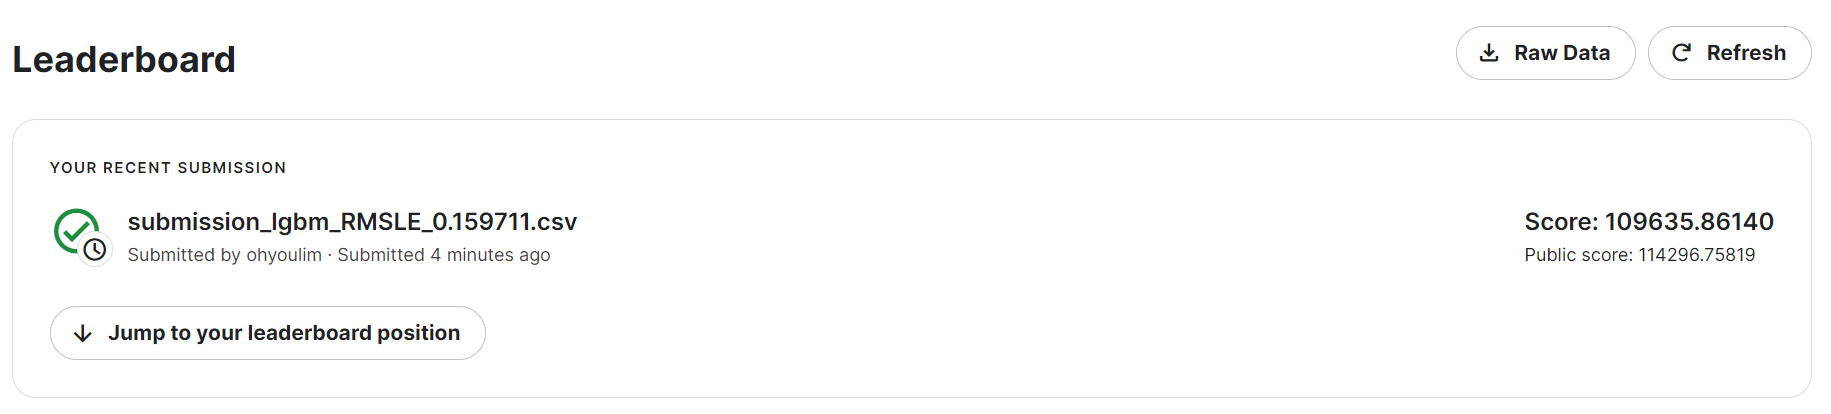

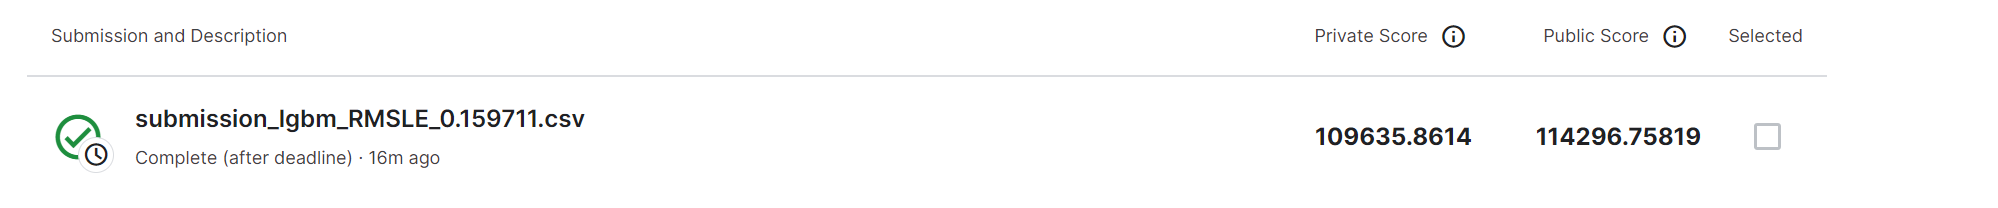

In [2]:
from IPython.display import Image
Image(filename='./data/kaggle.png') 
Image(filename='./data/kaggle1.png') 

## 분석환경

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 1. DATA 준비

#### ✓ 데이터 살펴보기  

Data Description
1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

#### ✓ 데이터 불러오기

In [4]:
train_data_path = './data/train.csv'
test_data_path = './data/test.csv'

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


In [5]:
# train data 확인
train.head()
train.info()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [6]:
# test data 확인
test.head()
test.info()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

#### ✓ train data에서 라벨 제거하기
* y에 price 저장

In [7]:
y = train['price']
del train['price']

print(train.columns)
y

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

#### ✓ train data와 test data 합치기

In [8]:
train_len = len(train)
data = pd.concat((train, test), axis=0)

train_len
len(data) - train_len
data.head()

15035

6468

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


## 2. 전처리 
* 결측치 확인
* data 분포 확인

#### ✓  결측치 확인

In [9]:
data.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### ✓ id, date 변수 정리  
* id 변수 제거 ( 집값 예측에 무관)  
* data 변수 변형 - 연월(yyyymm),  int type으로 변경

In [10]:
sub_id = data['id'][train_len:]
del data['id']

data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(int)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


#### ✓ featuer 변수들의 분포 확인

<AxesSubplot:xlabel='date', ylabel='Density'>

Text(0.5, 1.0, 'date')

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

Text(0.5, 1.0, 'bedrooms')

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

Text(0.5, 1.0, 'bathrooms')

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

Text(0.5, 1.0, 'sqft_living')

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

Text(0.5, 1.0, 'sqft_lot')

<AxesSubplot:xlabel='floors', ylabel='Density'>

Text(0.5, 1.0, 'floors')

<AxesSubplot:xlabel='waterfront', ylabel='Density'>

Text(0.5, 1.0, 'waterfront')

<AxesSubplot:xlabel='view', ylabel='Density'>

Text(0.5, 1.0, 'view')

<AxesSubplot:xlabel='condition', ylabel='Density'>

Text(0.5, 1.0, 'condition')

<AxesSubplot:xlabel='grade', ylabel='Density'>

Text(0.5, 1.0, 'grade')

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

Text(0.5, 1.0, 'sqft_above')

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

Text(0.5, 1.0, 'sqft_basement')

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

Text(0.5, 1.0, 'yr_built')

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

Text(0.5, 1.0, 'yr_renovated')

<AxesSubplot:xlabel='zipcode', ylabel='Density'>

Text(0.5, 1.0, 'zipcode')

<AxesSubplot:xlabel='lat', ylabel='Density'>

Text(0.5, 1.0, 'lat')

<AxesSubplot:xlabel='long', ylabel='Density'>

Text(0.5, 1.0, 'long')

<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

Text(0.5, 1.0, 'sqft_living15')

<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

Text(0.5, 1.0, 'sqft_lot15')

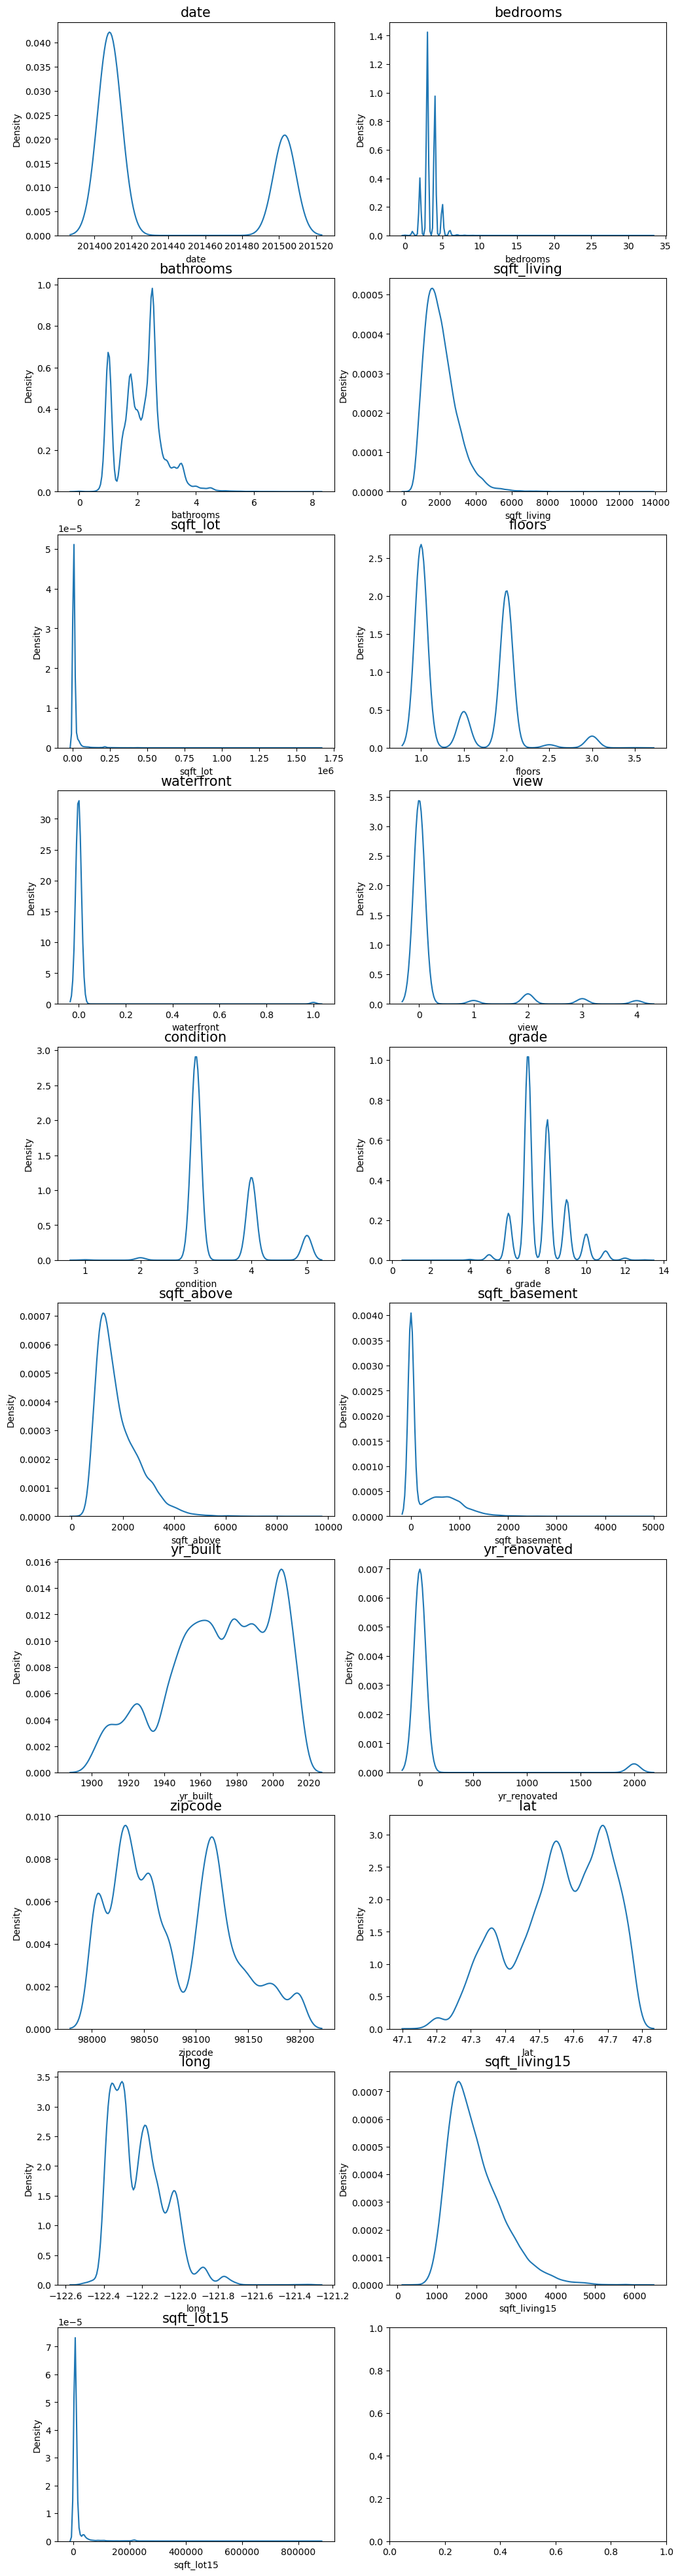

In [11]:
fig, ax = plt.subplots(10, 2, figsize=(12, 50))

count = 0
columns = data.columns
for row in range(10):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 변수가 한쪽으로 치우친 경향을 보여 log-scaling을 통해 데이터 분포를 정규분포에 가깝게 만듬

In [12]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

Text(0.5, 1.0, 'bedrooms')

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

Text(0.5, 1.0, 'sqft_living')

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

Text(0.5, 1.0, 'sqft_lot')

<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

Text(0.5, 1.0, 'sqft_above')

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

Text(0.5, 1.0, 'sqft_basement')

<AxesSubplot:xlabel='sqft_lot15', ylabel='Density'>

Text(0.5, 1.0, 'sqft_lot15')

<AxesSubplot:xlabel='sqft_living15', ylabel='Density'>

Text(0.5, 1.0, 'sqft_living15')

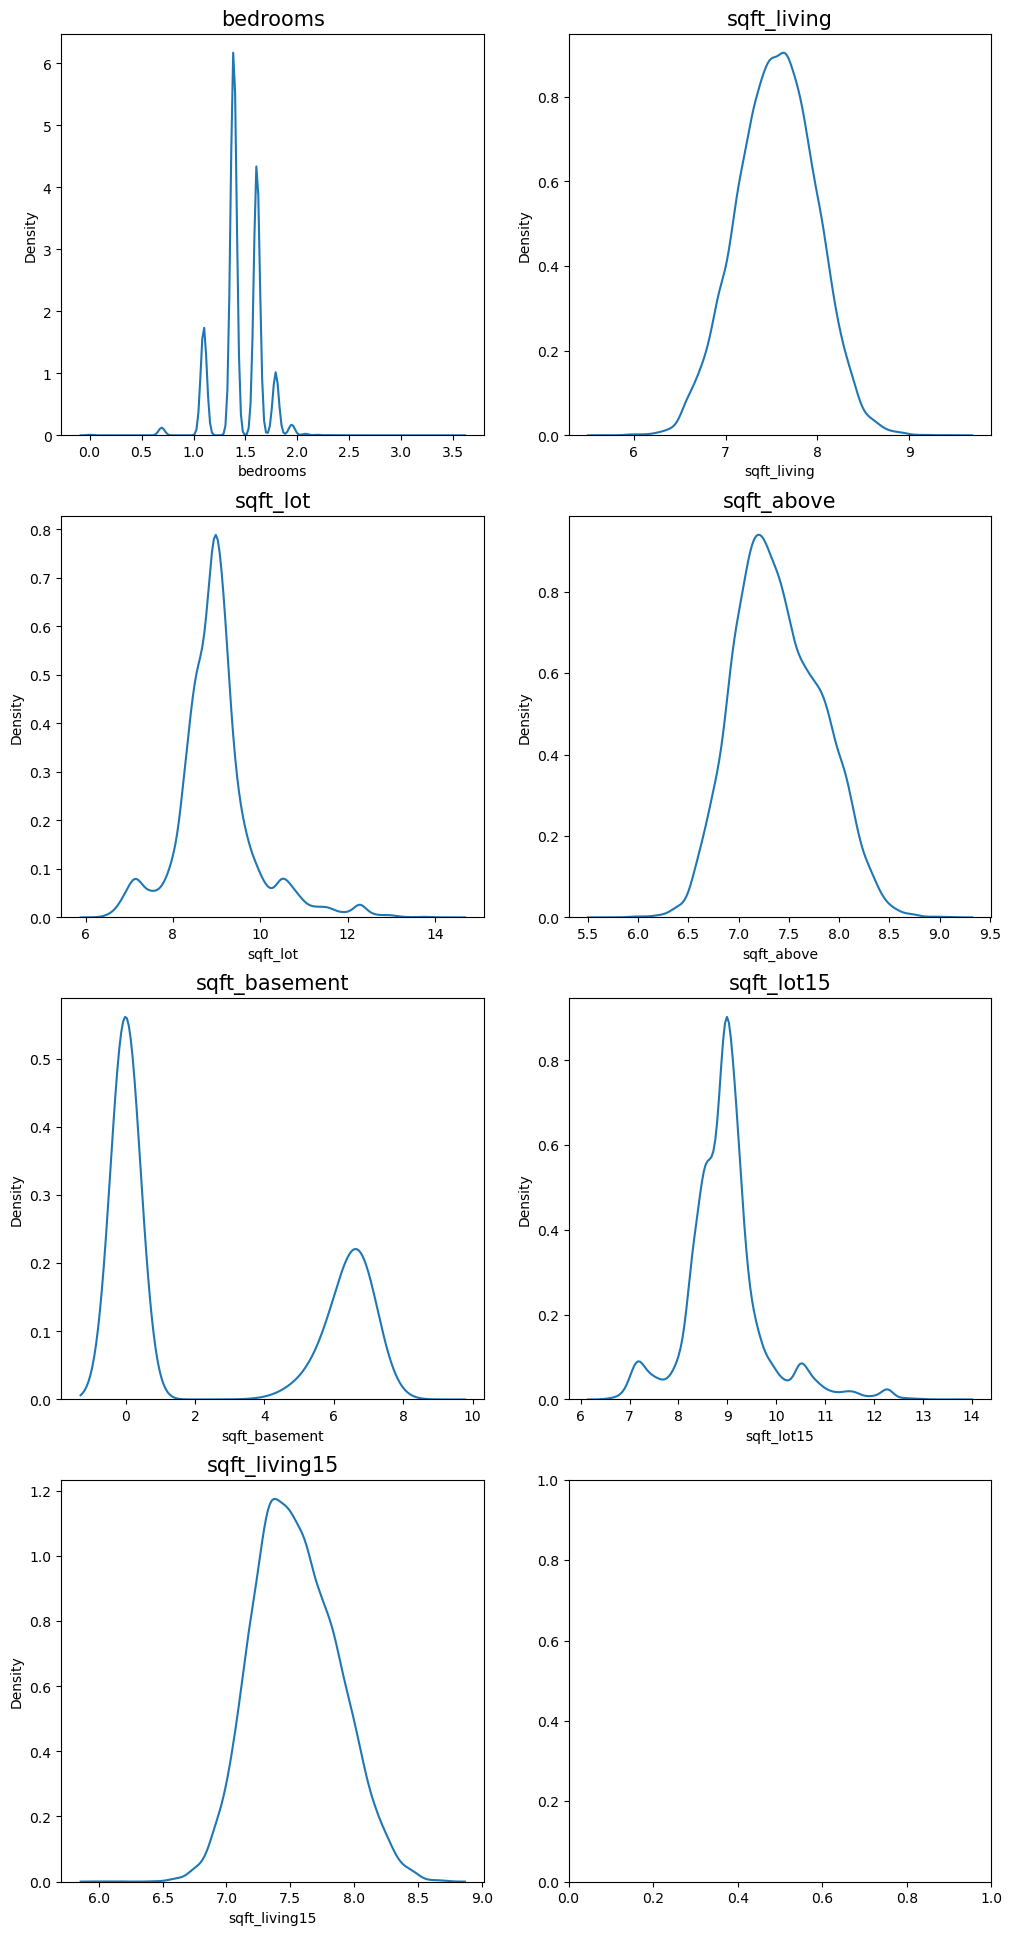

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

#### ✓ target 변수(price) 분포 확인

In [14]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

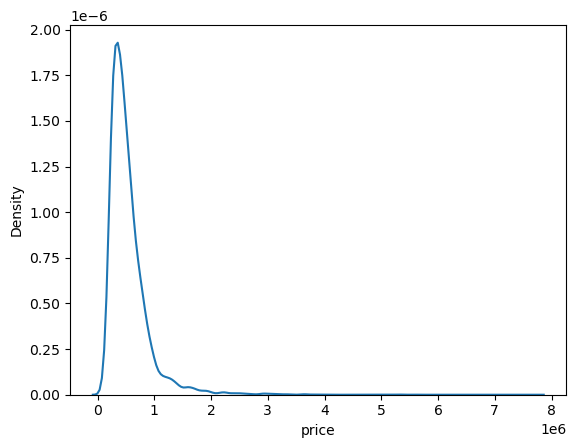

In [15]:
sns.kdeplot(y)
plt.show()

price data 왜곡이 심해서 로그변환

In [16]:
y_log = np.log1p(y)
y_log

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

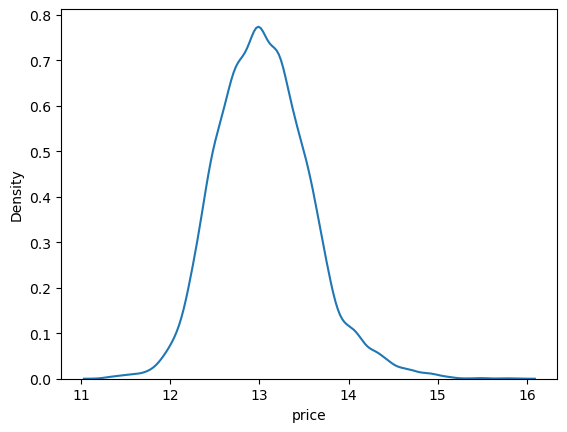

In [17]:
sns.kdeplot(y_log)
plt.show()

#### train data/ test data 분리

In [18]:
train = data.iloc[:train_len, :]
test = data.iloc[train_len:, :]


print(train.shape)
print(test.shape)

(15035, 19)
(6468, 19)


#### 모든 data 실수/정수형 확인
- 모델 학습에 활용 가능

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  float64
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  float64
 4   sqft_lot       15035 non-null  float64
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  float64
 11  sqft_basement  15035 non-null  float64
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  float64
 18  sqft_l

In [20]:
type(train)
type(test)
type(y_log)
type(sub_id)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas.core.series.Series

## 3. 모델링

회귀 트리 알고리즘 설계
* LGBM Regressor
* XGB Regressor, 
* RandomForest Regressor
* GradientBoosting Regressor


#### 모델 성능 최대화 
* 하이퍼 파라미터 튜닝

#### GridSearchCV function
- 교차 검증과 하이퍼 파라미터 튜닝을 위해 GridSearchCV 이용

In [21]:
from sklearn.model_selection import GridSearchCV

def my_GridSearch(model, train, y_log, param_grid, verbose=2, n_jobs=5):

    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y_log)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results

#### 최적의 hyper parameter 찾기

* Random Forest

In [30]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022  

# RandomForestRegressor
rf_params = {
    'max_depth' : [25,20,23],
    'min_samples_leaf' : [1,2],
    'min_samples_split' : [2,3]
}
rf_model = RandomForestRegressor(random_state=random_state)
my_GridSearch(rf_model, train, y_log, rf_params, verbose=2, n_jobs=2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,max_depth,min_samples_leaf,min_samples_split,score,RMSLE
4,20,1,2,-0.031841,0.178440
2,25,2,2,-0.031857,0.178486
3,25,2,3,-0.031857,0.178486
6,20,2,2,-0.031860,0.178495
7,20,2,3,-0.031860,0.178495
5,20,1,3,-0.031870,0.178522
0,25,1,2,-0.031882,0.178556
1,25,1,3,-0.031911,0.178637


In [25]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022  

# RandomForestRegressor
rf_params = {
    'n_estimators' : [500,1000],
    'max_depth' : [20,23],
    'min_samples_leaf' : [1,2],
    'min_samples_split' : [2,3]
}
rf_model = RandomForestRegressor(random_state=random_state)
my_GridSearch(rf_model, train, y_log, rf_params, verbose=2, n_jobs=2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


,max_depth,min_samples_leaf,min_samples_split,n_estimators,score,RMSLE
11,23,1,3,1000,-0.031380,0.177143
10,23,1,3,500,-0.031390,0.177171
9,23,1,2,1000,-0.031390,0.177172
8,23,1,2,500,-0.031394,0.177183
1,20,1,2,1000,-0.031408,0.177222
3,20,1,3,1000,-0.031408,0.177224
2,20,1,3,500,-0.031412,0.177234
0,20,1,2,500,-0.031440,0.177314
13,23,2,2,1000,-0.031481,0.177428
15,23,2,3,1000,-0.031481,0.177428


* LightGBM Regressor

In [22]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022        

lgbm_params = {
    'n_estimators': [250,300,350],
    'max_depth': [15,20,25],
}

lgbm_model = LGBMRegressor(random_state=random_state)
my_GridSearch(lgbm_model, train, y_log, lgbm_params, verbose=2, n_jobs=2)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,max_depth,n_estimators,score,RMSLE
4,20,300,-0.026090,0.161525
7,25,300,-0.026090,0.161525
3,20,250,-0.026126,0.161636
6,25,250,-0.026126,0.161636
5,20,350,-0.026152,0.161717
8,25,350,-0.026152,0.161717
2,15,350,-0.026269,0.162078
1,15,300,-0.026271,0.162082
0,15,250,-0.026305,0.162189


[CV] END .....................max_depth=15, n_estimators=250; total time=   3.6s
[CV] END .....................max_depth=15, n_estimators=300; total time=   4.1s
[CV] END .....................max_depth=15, n_estimators=350; total time=   5.0s
[CV] END .....................max_depth=20, n_estimators=250; total time=   3.4s
[CV] END .....................max_depth=20, n_estimators=300; total time=   3.6s
[CV] END .....................max_depth=20, n_estimators=350; total time=   3.8s
[CV] END .....................max_depth=25, n_estimators=250; total time=   3.9s
[CV] END .....................max_depth=25, n_estimators=300; total time=   3.3s
[CV] END .....................max_depth=25, n_estimators=350; total time=   4.9s
[CV] END .....................max_depth=15, n_estimators=250; total time=   3.1s
[CV] END .....................max_depth=15, n_estimators=300; total time=   3.9s
[CV] END .....................max_depth=15, n_estimators=350; total time=   4.7s
[CV] END ...................

In [63]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022      

lgbm_params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'learning_rate' : [0.1,0.05],
    'max_depth' : [-1,10,20,30],
    'min_child_samples' : [20, 10, 30],
    'num_leaves' : [31,20,40 ],
#    'boosting_type' : [gbdt],
#    'subsample' : [1.0]
    'colsample_bytree' : [1.0,0.8,0.6], 
#    'reg_lamda' : [0],
#    'reg_alpha' : [0],
#    'objective' : [reg:linear]   
}

lgbm_model = LGBMRegressor(random_state=random_state)
my_GridSearch(lgbm_model, train, y_log, lgbm_params, verbose=2, n_jobs=2)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


,colsample_bytree,learning_rate,max_depth,min_child_samples,n_estimators,num_leaves,score,RMSLE
1049,0.6,0.05,30,20,500,40,-0.025507,0.159711
914,0.6,0.05,-1,20,500,40,-0.025507,0.159711
987,0.6,0.05,10,30,500,31,-0.025513,0.159728
1004,0.6,0.05,20,20,500,40,-0.025534,0.159795
1046,0.6,0.05,30,20,400,40,-0.025541,0.159816
...,...,...,...,...,...,...,...,...
946,0.6,0.05,10,20,100,20,-0.030718,0.175264
961,0.6,0.05,10,10,100,20,-0.030759,0.175383
1036,0.6,0.05,30,20,100,20,-0.030816,0.175546
901,0.6,0.05,-1,20,100,20,-0.030816,0.175546


In [22]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022      

lgbm_params = {
    'n_estimators' : [500, 600,1000],
    'learning_rate' : [0.03,0.05],
    'max_depth' : [-1,10,20,30,40,50],
    'min_child_samples' : [20, 10, 30],
    'num_leaves' : [31,40,50 ],
#    'boosting_type' : [gbdt],
#    'subsample' : [1.0]
    'colsample_bytree' : [1.0,0.8,0.6], 
#    'reg_lamda' : [0],
#    'reg_alpha' : [0],
#    'objective' : [reg:linear]   
}

lgbm_model = LGBMRegressor(random_state=random_state)
my_GridSearch(lgbm_model, train, y_log, lgbm_params, verbose=2, n_jobs=2)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


,colsample_bytree,learning_rate,max_depth,min_child_samples,n_estimators,num_leaves,score,RMSLE
726,0.6,0.03,20,30,1000,31,-0.025231,0.158843
807,0.6,0.03,50,30,1000,31,-0.025242,0.158877
780,0.6,0.03,40,30,1000,31,-0.025242,0.158877
672,0.6,0.03,-1,30,1000,31,-0.025242,0.158877
753,0.6,0.03,30,30,1000,31,-0.025242,0.158877
...,...,...,...,...,...,...,...,...
296,1.0,0.05,40,30,1000,50,-0.026520,0.162848
323,1.0,0.05,50,30,1000,50,-0.026520,0.162848
269,1.0,0.05,30,30,1000,50,-0.026533,0.162890
242,1.0,0.05,20,30,1000,50,-0.026549,0.162937


* XGBRegressor

In [23]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022        

xgb_params = {
    'n_estimators' : [300,500,800,1000],
    'learning_rate' : [0.3,0.1,0.05],
#    'num_iterations' : [100,500,1000],
    'max_depth' : [0,6,10,20,30],
#    'boosting' : ['gblinear','gbtree','dart'],
}


xgb_model = XGBRegressor(random_state=random_state)
my_GridSearch(xgb_model, train, y_log, xgb_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,learning_rate,max_depth,n_estimators,score,RMSLE
46,0.05,6,800,-0.025808,0.160650
47,0.05,6,1000,-0.025818,0.160679
45,0.05,6,500,-0.025972,0.161157
49,0.05,10,500,-0.026293,0.162151
48,0.05,10,300,-0.026307,0.162194
25,0.10,6,500,-0.026310,0.162204
24,0.10,6,300,-0.026346,0.162315
50,0.05,10,800,-0.026405,0.162496
51,0.05,10,1000,-0.026447,0.162626
26,0.10,6,800,-0.026565,0.162989


* GradientBoostingRegressor

In [47]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022 


# GradientBoostingRegressor
gb_params = {
    'learning_rate' : [0.2,0.3,0.1,0.05],
    'n_estimators' : [200,300],
    'subsample' : [0.5,0.7,1]
    
}

gb_model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(gb_model, train, y_log, gb_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,n_estimators,subsample,score,RMSLE
11,0.2,300,1.0,-0.028141,0.167753
4,0.1,300,0.7,-0.028344,0.168357
10,0.2,300,0.7,-0.028527,0.168900
5,0.1,300,1.0,-0.028609,0.169142
3,0.1,300,0.5,-0.028689,0.169380
9,0.2,300,0.5,-0.028702,0.169415
8,0.2,200,1.0,-0.028788,0.169671
7,0.2,200,0.7,-0.028885,0.169957
6,0.2,200,0.5,-0.029181,0.170825
1,0.1,200,0.7,-0.029724,0.172407


In [31]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

random_state=2022 


# GradientBoostingRegressor
gb_params = {
    'learning_rate' : [0.1,0.05],
    'n_estimators' : [500,1000],
    'subsample' : [0.5,0.7,1]
}

gb_model = GradientBoostingRegressor(random_state=random_state)
my_GridSearch(gb_model, train, y_log, gb_params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,n_estimators,subsample,score,RMSLE
4,0.10,1000,0.7,-0.026657,0.163270
5,0.10,1000,1.0,-0.026957,0.164187
10,0.05,1000,0.7,-0.027059,0.164495
1,0.10,500,0.7,-0.027278,0.165161
3,0.10,1000,0.5,-0.027325,0.165302
9,0.05,1000,0.5,-0.027333,0.165328
2,0.10,500,1.0,-0.027517,0.165883
11,0.05,1000,1.0,-0.027537,0.165944
0,0.10,500,0.5,-0.027829,0.166820
7,0.05,500,0.7,-0.028621,0.169177


#### save_submission func
- 모델 학습/예측/결과 저장/제출

In [24]:
def save_submission(model, train, y_log, test, model_name, rmsle=None):
    model.fit(train, y_log)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = './data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission.head()
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

### 최적의 hyper parameter 적용하여 모델 학습 후 예측 결과 생성

* LightGBM

In [29]:
# colsample_bytree=0.6, learning_rate=0.03,max_depth=-1, min_child_samples=30,n_estimators=1000,num_leaves=31

lgbm_model = LGBMRegressor(colsample_bytree=0.6, learning_rate=0.03,max_depth=-1, min_child_samples=30,n_estimators=1000,num_leaves=31,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.158877')

./data/submission_lgbm_RMSLE_0.158877.csv saved!


In [30]:
# colsample_bytree=0.6, learning_rate=0.03,max_depth=20, min_child_samples=30,n_estimators=1000,num_leaves=31

lgbm_model = LGBMRegressor(colsample_bytree=0.6, learning_rate=0.03,max_depth=20, min_child_samples=30,n_estimators=1000,num_leaves=31,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.158843')

./data/submission_lgbm_RMSLE_0.158843.csv saved!


In [70]:
# colsample_bytree=0.6, learning_rate=0.05,max_depth=30, min_child_samples=20,n_estimators=500,num_leaves=40

lgbm_model = LGBMRegressor(colsample_bytree=0.6, learning_rate=0.05,max_depth=30, min_child_samples=20,n_estimators=500,num_leaves=40,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.159711')

./data/submission_lgbm_RMSLE_0.159711.csv saved!


In [69]:
# colsample_bytree=0.8, learning_rate=0.05,max_depth=30, min_child_samples=30,n_estimators=500,num_leaves=41

lgbm_model = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05,max_depth=30, min_child_samples=30,n_estimators=500,num_leaves=40,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.160042')

./data/submission_lgbm_RMSLE_0.160042.csv saved!


In [58]:
# colsample_bytree=0.8, learning_rate=0.05,max_depth=10, min_child_samples=30,n_estimators=500,num_leaves=31

lgbm_model = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05,max_depth=10, min_child_samples=30,n_estimators=500,num_leaves=31,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.159972')

./data/submission_lgbm_RMSLE_0.159972.csv saved!


In [52]:
# colsample_bytree=0.8, max_depth=10, min_child_samples=20,n_estimators=400,num_leaves=20

lgbm_model = LGBMRegressor(colsample_bytree=0.8, max_depth=10, min_child_samples=20,n_estimators=400,num_leaves=20,random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.160633')

./data/submission_lgbm_RMSLE_0.160633.csv saved!


In [65]:
lgbm_model = LGBMRegressor(max_depth=20, n_estimators=300, random_state=random_state)
save_submission(lgbm_model, train, y_log, test, 'lgbm', rmsle='0.161520')

./data/submission_lgbm_RMSLE_0.161520.csv saved!


* Random Forest

In [32]:
# max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=1000
rf_model = RandomForestRegressor(max_depth=23, min_samples_leaf=1, min_samples_split=3, n_estimators=1000, random_state=random_state)
save_submission(rf_model, train, y_log, test, 'randomforest', rmsle='0.177143')

./data/submission_randomforest_RMSLE_0.177143.csv saved!


* XGBoost

In [36]:
# learning_rate=0.05,max_depth=6,n_estimators=800
xgb_model = XGBRegressor(learning_rate=0.05,max_depth=6,n_estimators=800, random_state=random_state)
save_submission(xgb_model, train, y_log, test, 'xgb', rmsle='0.160650')

./data/submission_xgb_RMSLE_0.160650.csv saved!


* GradientBoost

In [35]:
# learning_rate=0.2 ,n_estimators=300 ,subsample=1.0
gb_model = GradientBoostingRegressor(learning_rate=0.2 ,n_estimators=300 ,subsample=1.0, random_state=random_state)
save_submission(gb_model, train, y_log, test, 'gb', rmsle='0.167753')

./data/submission_gb_RMSLE_0.167753.csv saved!


## 회고
* linear regression 외에 Decision Tree, Random Forest, GBM, XGBoost, LightGBM 등의 Calssification에 속하는 Tree 기반 알고리즘이 분류 뿐만 아니라 회귀도 가능하다는 것을 알았음
* 성능을 높이는 방법에는 기본적으로 EDA 과정을 통해 피처 엔지니어링을 진행하여 데이터를 정제하는 것이 중요하지만, 이번에는 모델의 성능을 최대화 하기 위한 방법으로 하이퍼 파라미터 튜닝에 집중하였음.
* 사실 데이터 이상치 찾아 수정하기, 관계없는 피쳐 제거 등을 하고 싶었지만, 부동산 관련 지식이 없다보니, 데이터 탐색이 어렵게 느껴졌음. 
* 데이터 EDA 과정을 통해서 유의미한 정보를 발견하는 연습을 많이 해야함을 느꼈음
* 하이퍼 파라미터 튜닝 시에 크게 영향을 미치는 변수를 먼저 선별하여 튜닝하고, 그 다음 그 외 다른 변수들을 튜닝했었으면 시간이 덜 걸렸을 텐데, 한 번에 모든 변수를 튜닝하다 보니, 시간이 오래 걸림
* train dataset 에서 성능이 좋다고 test dataset에서도 결과가 좋은게 아니였음.
  * train dataset에 overfitting 되는 경우 발생
* 특히 하이퍼 파라미터 튜닝 시에 최적의 파라미터를 찾기위에 파라미터 값을 얼마만큼씩 차이를 두고 입력해야 하는지 몰라서, 시간이 오래 걸렸음 
* 초기 default 값으로 성능 비교 시에, LightGBM의 성능이 다른 모델보다 좋아서, LightGBM을 집중적으로 공략했음

## 참고 문헌

* https://injo.tistory.com/48
* http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/
* https://wikibook.co.kr/pymldg-rev/
